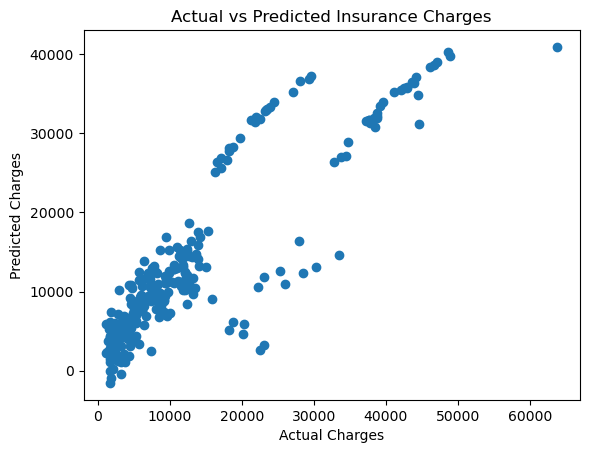

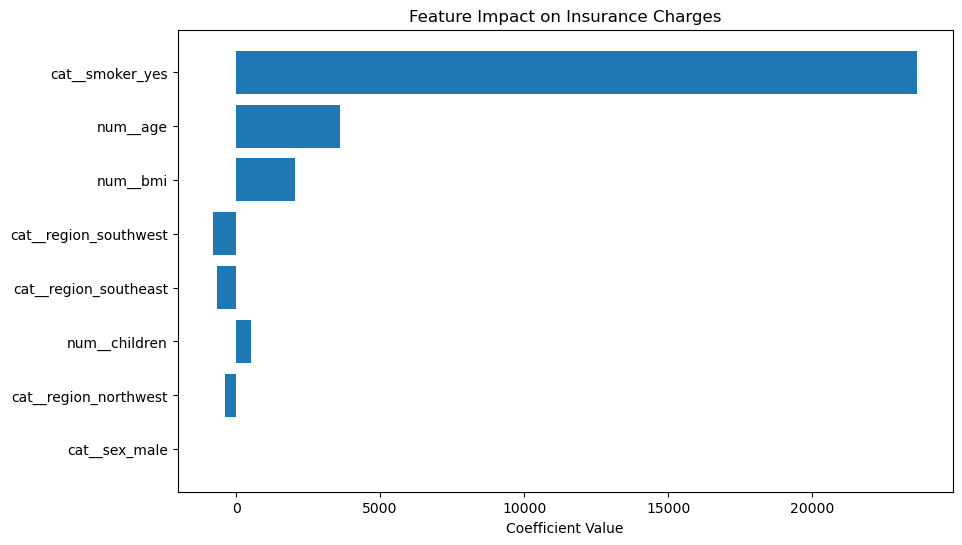

R2 Score: 0.7835929767120722
RMSE: 5796.284659276274
        VIF
0  1.015843
1  1.088673
2  1.003348
3  1.674830
4  1.228075
5  1.223453
6  1.357419
7  1.215686


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("insurance.csv")

X = df.drop("charges", axis=1)
y = df["charges"]

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)
X_processed = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(X_processed.values, i) for i in range(X_processed.shape[1])]

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

feature_names = preprocessor.get_feature_names_out()
coefficients = model.coef_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Feature Impact on Insurance Charges")
plt.gca().invert_yaxis()
plt.show()

print("R2 Score:", r2)
print("RMSE:", rmse)
print(vif_data)
